In [50]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 


### Load data 

In [51]:
df = pd.read_csv('owid-covid-data.csv')

### Show shape and column names

In [52]:
df.shape

(429435, 67)

In [53]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

### Needed Columns

In [54]:
columns_needed = ['date' , 'location' , 'total_deaths','population','continent','total_vaccinations']

df = df[columns_needed]

In [55]:
df

,date,location,total_deaths,population,continent,total_vaccinations
0,2020-01-05,Afghanistan,0.0,41128772,Asia,NaN
1,2020-01-06,Afghanistan,0.0,41128772,Asia,NaN
2,2020-01-07,Afghanistan,0.0,41128772,Asia,NaN
3,2020-01-08,Afghanistan,0.0,41128772,Asia,NaN
4,2020-01-09,Afghanistan,0.0,41128772,Asia,NaN
...,...,...,...,...,...,...
429430,2024-07-31,Zimbabwe,5740.0,16320539,Africa,NaN
429431,2024-08-01,Zimbabwe,5740.0,16320539,Africa,NaN
429432,2024-08-02,Zimbabwe,5740.0,16320539,Africa,NaN
429433,2024-08-03,Zimbabwe,5740.0,16320539,Africa,NaN


### Drop Rows with missing location or date

In [56]:
df = df.dropna(subset = ['location' , 'date'])

In [57]:
df

,date,location,total_deaths,population,continent,total_vaccinations
0,2020-01-05,Afghanistan,0.0,41128772,Asia,NaN
1,2020-01-06,Afghanistan,0.0,41128772,Asia,NaN
2,2020-01-07,Afghanistan,0.0,41128772,Asia,NaN
3,2020-01-08,Afghanistan,0.0,41128772,Asia,NaN
4,2020-01-09,Afghanistan,0.0,41128772,Asia,NaN
...,...,...,...,...,...,...
429430,2024-07-31,Zimbabwe,5740.0,16320539,Africa,NaN
429431,2024-08-01,Zimbabwe,5740.0,16320539,Africa,NaN
429432,2024-08-02,Zimbabwe,5740.0,16320539,Africa,NaN
429433,2024-08-03,Zimbabwe,5740.0,16320539,Africa,NaN


### filter country 

In [58]:
countries = ['Pakistan' , 'India', 'United States' ,'United kingdom' ,'Germany']
df_countries = df[ df['location'].isin(countries)]

In [59]:
df_countries.loc[:,'date'] = pd.to_datetime(df_countries['date'])

In [60]:
df_countries.head()

,date,location,total_deaths,population,continent,total_vaccinations
140411,2020-01-05 00:00:00,Germany,3.0,83369840,Europe,NaN
140412,2020-01-06 00:00:00,Germany,3.0,83369840,Europe,NaN
140413,2020-01-07 00:00:00,Germany,3.0,83369840,Europe,NaN
140414,2020-01-08 00:00:00,Germany,3.0,83369840,Europe,NaN
140415,2020-01-09 00:00:00,Germany,3.0,83369840,Europe,NaN


In [61]:
df_countries['location'].unique()

array(['Germany', 'India', 'Pakistan', 'United States'], dtype=object)

In [62]:
df[ df['location'] == 'Pakistan']

,date,location,total_deaths,population,continent,total_vaccinations
290973,2020-01-05,Pakistan,0.0,235824864,Asia,NaN
290974,2020-01-06,Pakistan,0.0,235824864,Asia,NaN
290975,2020-01-07,Pakistan,0.0,235824864,Asia,NaN
290976,2020-01-08,Pakistan,0.0,235824864,Asia,NaN
290977,2020-01-09,Pakistan,0.0,235824864,Asia,NaN
...,...,...,...,...,...,...
292642,2024-07-31,Pakistan,30656.0,235824864,Asia,NaN
292643,2024-08-01,Pakistan,30656.0,235824864,Asia,NaN
292644,2024-08-02,Pakistan,30656.0,235824864,Asia,NaN
292645,2024-08-03,Pakistan,30656.0,235824864,Asia,NaN


### Line plot 

In [63]:
pakistan = df_countries[ df_countries[ 'location'] == 'Pakistan']
pakistan = pakistan.dropna(subset = ['total_deaths'])

In [64]:
df.columns.tolist()

['date',
 'location',
 'total_deaths',
 'population',
 'continent',
 'total_vaccinations']

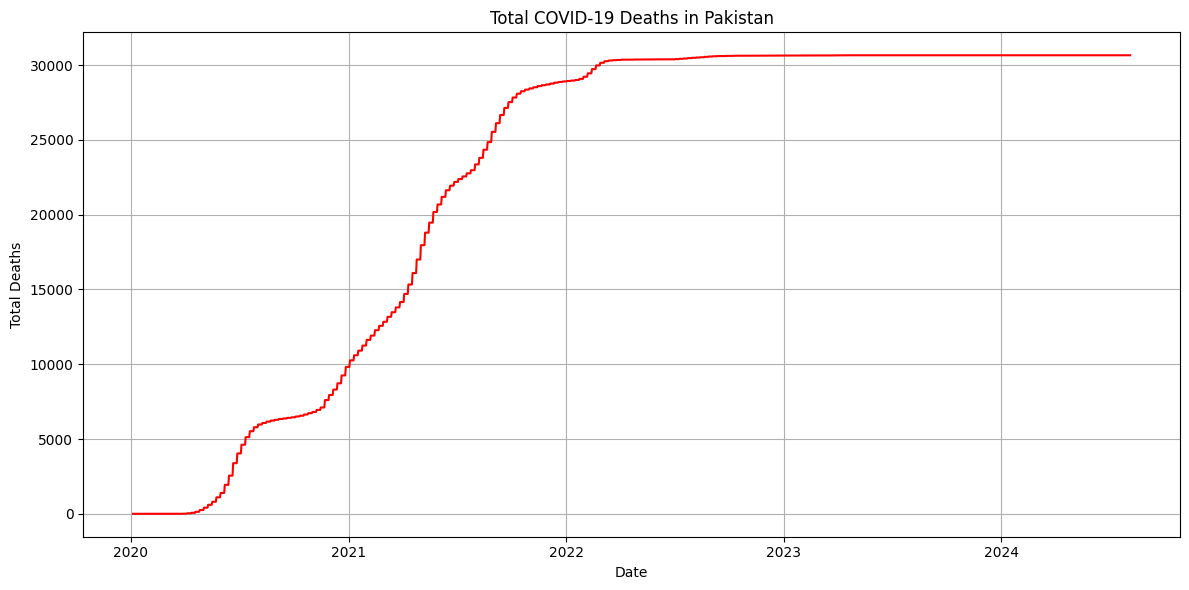

In [65]:
plt.figure(figsize = (12 ,6 ))
plt.plot(pakistan['date'],pakistan ['total_deaths'],color='red')
plt.title('Total COVID-19 Deaths in Pakistan')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.grid(True)
plt.tight_layout()
plt.show()

### Bar chart -Totall Deaths the Five Countries

In [66]:
# get the latest date 
#latest_deaths = df_countries[ 'date'].max()

In [74]:
#drop missing totall deaths 
deaths_data = df_countries.dropna(subset=['total_deaths'])

#sort by date (so latest record come last )
deaths_data = deaths_data.sort_values(by=['location','date'])

# get latest record (non-null ) for each country 

latest_deaths = deaths_data.groupby('location').tail(1)

# looks data looks good 
print(latest_deaths[['location','date','total_deaths']])



             location                 date  total_deaths
142084        Germany  2024-08-04 00:00:00      174979.0
175222          India  2024-08-04 00:00:00      533623.0
292646       Pakistan  2024-08-04 00:00:00       30656.0
405124  United States  2024-08-04 00:00:00     1193165.0


### Bar Chart

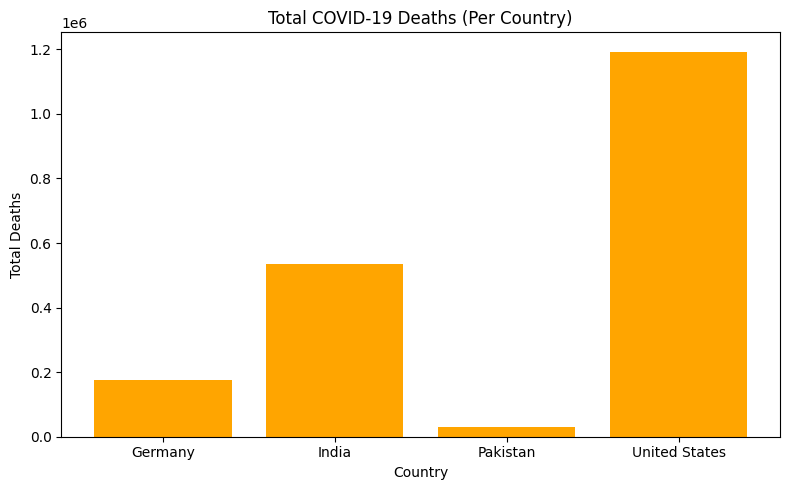

In [88]:
plt.figure(figsize=(8,5))
plt.bar(latest_deaths['location'], latest_deaths['total_deaths'],color='orange')
plt.title('Total COVID-19 Deaths (Per Country)')
plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.tight_layout()
plt.show()


### Pie Chart - Vaccination Distribution

In [ ]:
# Drop Missing Vaccination Data 
vacc_data = df_countries.dropna(subset=['total_vaccinations'])

# sort and get latest available value for each country 
vacc_data = vacc_data.sort_values( by= ['location','date'])
latest_vacc = vacc_data.groupby('location').tail(1)



### Plot pie Chart

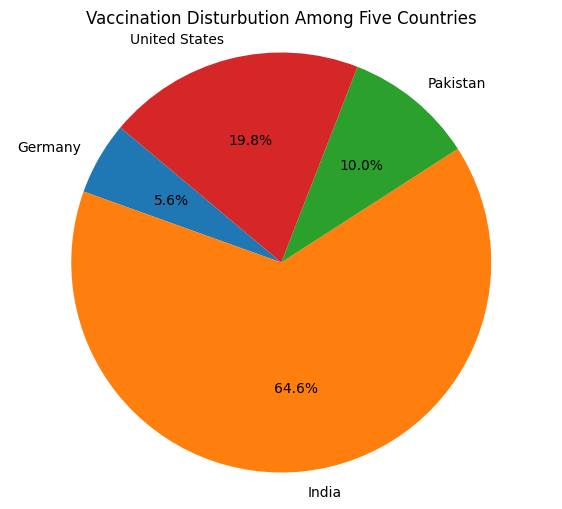

In [82]:
plt.figure(figsize=(7,6))
plt.pie(latest_vacc['total_vaccinations'] , labels = latest_vacc['location'],autopct='%1.1f%%',startangle=140) 
plt.title('Vaccination Disturbution Among Five Countries')
plt.axis('equal')
plt.show()

### Scatter Plot- Deaths Vs Population

In [90]:
 # Drop Missing values 
scatter_data = df_countries.dropna( subset =['total_deaths','population'])

# Get Latest Data Per Country
scatter_data = scatter_data.sort_values(by=['location','date'])
scatter_latest = scatter_data.groupby('location').tail(1)



### Plot 

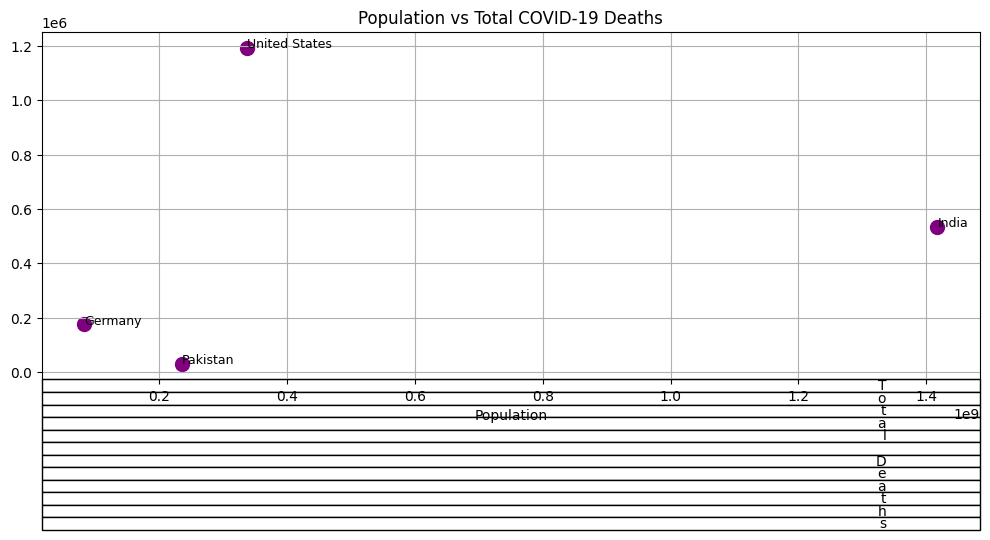

In [97]:
plt.figure(figsize=(10,6))
plt.scatter(scatter_latest['population'],scatter_latest['total_deaths'], color='purple',s = 100)

# Adding labels to points
for i in range(scatter_latest.shape[0]):
    plt.text(
    scatter_latest['population'].iloc[i],
    scatter_latest['total_deaths'].iloc[i], 
    
    scatter_latest['location'].iloc[i],fontsize=9)

plt.title('Population vs Total COVID-19 Deaths')
plt.xlabel('Population')
plt.table('Total Deaths')
plt.grid(True)
plt.tight_layout()
plt.show()
